In [17]:
#Importando dados excel
import os
cwd = os.getcwd()
cwd
os.chdir('/Users/luizbezerra/Desktop/git/notebooks/')

In [18]:
import pandas as pd
file = 'estudo_simulacao_garch_st.xlsx'
xl = pd.ExcelFile(file)
df1 = xl.parse('omega')

In [19]:
df1.head(15)

,omega,omega.garch.t,omega.garch.st,omega.gas,omega.gas.t,omega.gas.sp,omega.gas.st
0,1.926425,2.232696,2.412563,3.435037,2.850051,3.207958,2.100080
1,1.411780,2.017008,2.011055,3.421231,2.867386,3.292142,1.693346
2,1.892917,2.623023,2.438443,3.474305,3.052820,3.226854,1.740863
3,2.079057,2.767353,2.428557,3.639065,3.072533,3.456217,1.443190
4,3.226440,3.594388,3.520918,3.484825,3.032218,3.208019,2.375117
5,1.042798,0.846233,1.093978,3.338494,2.942545,3.119908,1.923126
6,4.303336,2.230473,1.993462,3.658806,3.139047,3.586441,1.289937
7,1.310048,1.810941,1.864044,3.584808,3.107631,3.366155,1.509922
8,1.304909,2.340961,2.438258,3.452488,2.961874,3.421951,1.649339
9,1.046027,1.610090,1.548971,3.541317,3.118858,3.562783,1.589652


In [20]:
df1.mean()

omega             2.234322
omega.garch.t     2.102776
omega.garch.st    2.112175
omega.gas         3.505663
omega.gas.t       3.022079
omega.gas.sp      3.310140
omega.gas.st      1.777651
dtype: float64

In [21]:
df1.var()

omega             0.817861
omega.garch.t     0.356855
omega.garch.st    0.328983
omega.gas         0.014437
omega.gas.t       0.010149
omega.gas.sp      0.036991
omega.gas.st      0.130224
dtype: float64

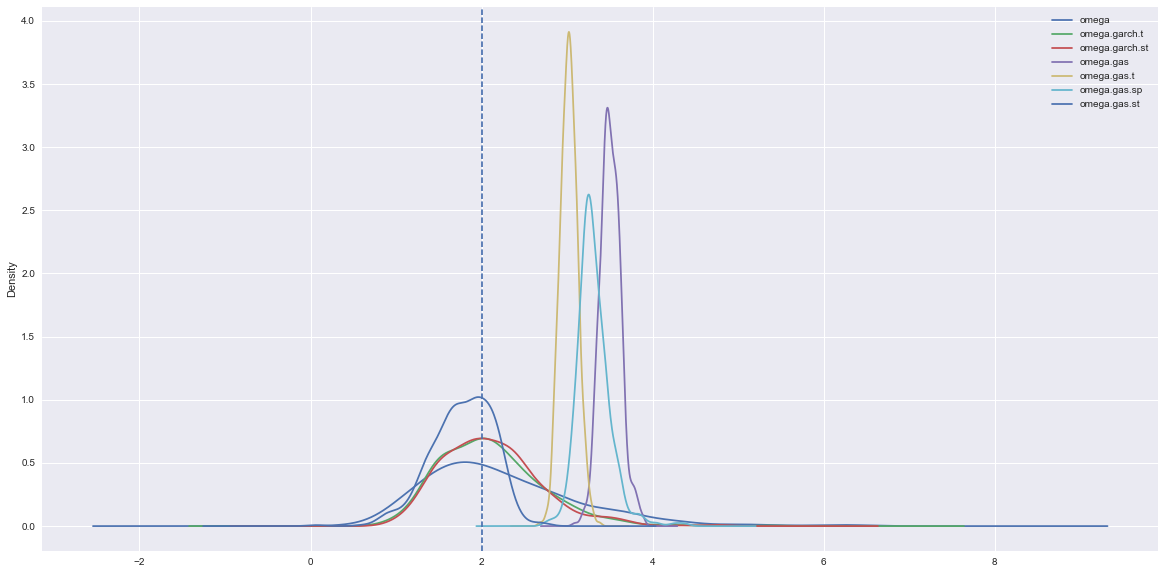

In [22]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
names = df1.columns.values
df1.plot(kind="kde",legend = True, figsize = (20,10))
plt.axvline(2, ls = 'dashed')
plt.show()
#for i in range(0,6,1): 
    #x = df1[[i]]
    #x = np.array(x)      
    #x = x.flatten()           
    #sns.kdeplot(x, bw=.05, label=names[i])
    #sns.distplot(x, hist = False, label=names[i]);
#plt.axvline(x=0.85)



In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
d = ({})
names = df1.columns.values
for i in range(0,7,1): 
    x = df1[[i]]
    x = np.array(x)      
    x = x.flatten()
    rms = sqrt(mean_squared_error(np.repeat(2, len(x)), x))
    d.update({names[i]: rms})

In [25]:
df = pd.DataFrame(d, index=['RMSE'])
df

,omega,omega.garch.st,omega.garch.t,omega.gas,omega.gas.sp,omega.gas.st,omega.gas.t
RMSE,0.933336,0.583868,0.605555,1.51044,1.324154,0.423556,1.027022
